## Data exploratory analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [5]:
url = r'https://raw.githubusercontent.com/MSI17819/Berlin_bike_theft_prediction/main/Berlin_bike_thief_file_for_analysis.csv'

df = pd.read_csv(url, sep=',', encoding="utf-8")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35497 entries, 0 to 35496
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Record_date              35497 non-null  object
 1   Record_day               35497 non-null  int64 
 2   Record_month             35497 non-null  int64 
 3   Record_year              35497 non-null  int64 
 4   Stealing_date            35497 non-null  object
 5   Stealing_hour            35497 non-null  int64 
 6   Report_stealing_date     35497 non-null  object
 7   Report_stealing_hour     35497 non-null  int64 
 8   Berlin_code_area         35497 non-null  int64 
 9   Bike_value               35497 non-null  int64 
 10  Unsuccesful_attempt      35497 non-null  object
 11  Bike_type                35497 non-null  object
 12  Crime_type               35497 non-null  object
 13  Crime_reason             35497 non-null  object
 14  Administrative_district  35497 non-nul

In [6]:
df

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2022-09-19,19,9,2022,2022-09-16,18,2022-09-17,13,8100418,884,No,Women,Theft,Aggravated theft,Neukölln,Neukölln,Rixdorf,Hertzbergplatz
1,2022-09-19,19,9,2022,2022-09-17,20,2022-09-19,5,4501146,849,No,Men,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Wilmersdorf Zentrum,Volkspark Wilmersdorf,Barstraße
2,2022-09-19,19,9,2022,2022-09-17,21,2022-09-18,15,7100101,700,No,Bike,Theft,Aggravated theft,Tempelhof-Schöneberg,Schöneberg Nord,Schöneberg Nordwest,Wittenbergplatz
3,2022-09-19,19,9,2022,2022-09-14,20,2022-09-17,10,3701658,720,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Christburger Straße
4,2022-09-19,19,9,2022,2022-09-18,13,2022-09-19,8,1100308,600,No,Men,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Charitéviertel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35492,2021-01-02,2,1,2021,2021-01-01,1,2021-01-01,3,2100105,2000,No,Mountain,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Prinzenstraße
35493,2021-01-01,1,1,2021,2021-01-01,9,2021-01-01,11,4200206,290,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg West,Heerstraße,Kranzallee
35494,2021-01-01,1,1,2021,2021-01-01,5,2021-01-01,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
35495,2021-01-01,1,1,2021,2021-01-01,20,2021-01-01,20,2100104,2800,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz


#### Creat DataFrame copy for next visualisation and ML analysis steps. Original DataFrame is saved as good practise.

In [7]:
df_copy = df.copy()

#### Display DataFrame copy

In [8]:
df_copy

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2022-09-19,19,9,2022,2022-09-16,18,2022-09-17,13,8100418,884,No,Women,Theft,Aggravated theft,Neukölln,Neukölln,Rixdorf,Hertzbergplatz
1,2022-09-19,19,9,2022,2022-09-17,20,2022-09-19,5,4501146,849,No,Men,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Wilmersdorf Zentrum,Volkspark Wilmersdorf,Barstraße
2,2022-09-19,19,9,2022,2022-09-17,21,2022-09-18,15,7100101,700,No,Bike,Theft,Aggravated theft,Tempelhof-Schöneberg,Schöneberg Nord,Schöneberg Nordwest,Wittenbergplatz
3,2022-09-19,19,9,2022,2022-09-14,20,2022-09-17,10,3701658,720,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Christburger Straße
4,2022-09-19,19,9,2022,2022-09-18,13,2022-09-19,8,1100308,600,No,Men,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Charitéviertel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35492,2021-01-02,2,1,2021,2021-01-01,1,2021-01-01,3,2100105,2000,No,Mountain,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Prinzenstraße
35493,2021-01-01,1,1,2021,2021-01-01,9,2021-01-01,11,4200206,290,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg West,Heerstraße,Kranzallee
35494,2021-01-01,1,1,2021,2021-01-01,5,2021-01-01,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
35495,2021-01-01,1,1,2021,2021-01-01,20,2021-01-01,20,2100104,2800,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz


#### Change Record_day column for verbal day representation 

In [9]:
df_copy['Record_day'] = pd.to_datetime(df_copy['Record_date']).dt.day_name()

#### Day of week when most thiefs happend

In [10]:
df_copy.groupby('Record_day')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Record_day,
Monday,6149
Tuesday,5638
Wednesday,5637
Thursday,5344
Friday,4840
Sunday,4158
Saturday,3731


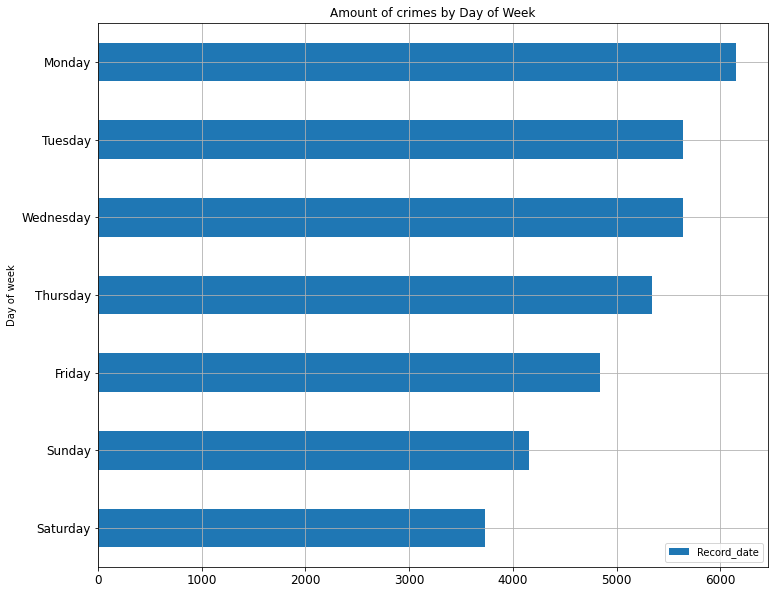

In [11]:
df_copy.groupby('Record_day')[['Record_date']].count()\
                .sort_values(by='Record_date', ascending=True)\
                .plot(kind='barh',
                figsize=(12,10),
                fontsize=12,
                title='Amount of crimes by Day of Week',
                xlabel='Day of week',
                grid=True);

#### Administrative district with most bike thiefs

In [12]:
df_copy.groupby('Administrative_district')[['Record_date']].count().sort_values(by=['Record_date'], ascending=False)

,Record_date
Administrative_district,
Pankow,5490
Mitte,5074
Friedrichshain-Kreuzberg,4962
Charlottenburg-Wilmersdorf,3811
Tempelhof-Schöneberg,2961
Neukölln,2765
Treptow-Köpenick,2758
Steglitz-Zehlendorf,2266
Lichtenberg,1994


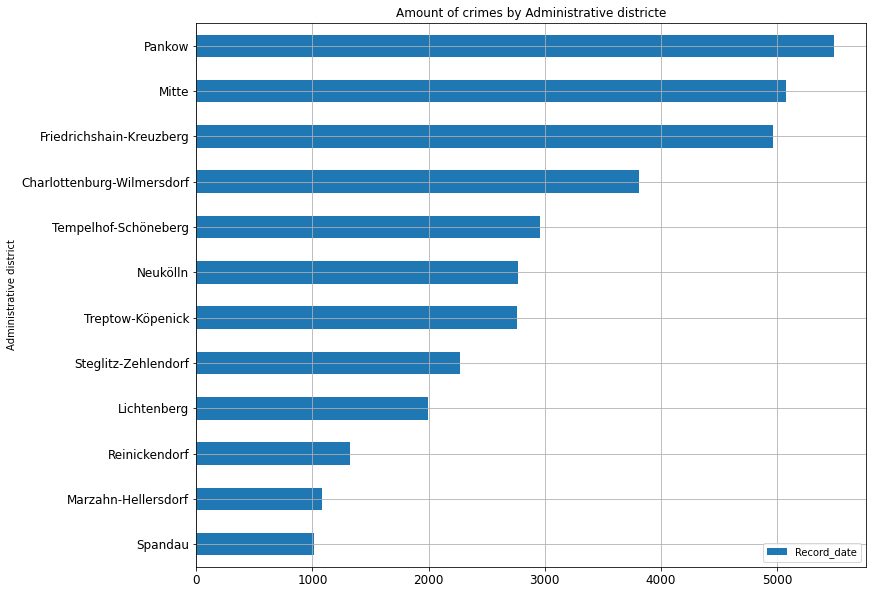

In [13]:
df_copy.groupby('Administrative_district')[['Record_date']].count()\
                                    .sort_values(by=['Record_date'], ascending=True)\
                                    .plot(kind='barh',
                                    figsize=(12,10),
                                    fontsize=12,
                                    title='Amount of crimes by Administrative districte',
                                    xlabel='Administrative district',
                                    grid=True);

#### Most stealing bike type

In [14]:
df_copy.groupby('Bike_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Bike_type,
Men,16387
Women,10235
Bike,5361
Mountain,1568
Child,1380
Racing,509
Cargo,57


In [15]:
df_copy.groupby('Crime_type')[['Record_date']].count().sort_values(by='Record_date', ascending=False)

,Record_date
Crime_type,
Theft,33977
Break-in,1520


#### Drop column *Record_date*

In [16]:
df_copy.drop(["Record_date"], axis=1, inplace=True)

In [17]:
df_copy

,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,Monday,9,2022,2022-09-16,18,2022-09-17,13,8100418,884,No,Women,Theft,Aggravated theft,Neukölln,Neukölln,Rixdorf,Hertzbergplatz
1,Monday,9,2022,2022-09-17,20,2022-09-19,5,4501146,849,No,Men,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Wilmersdorf Zentrum,Volkspark Wilmersdorf,Barstraße
2,Monday,9,2022,2022-09-17,21,2022-09-18,15,7100101,700,No,Bike,Theft,Aggravated theft,Tempelhof-Schöneberg,Schöneberg Nord,Schöneberg Nordwest,Wittenbergplatz
3,Monday,9,2022,2022-09-14,20,2022-09-17,10,3701658,720,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Christburger Straße
4,Monday,9,2022,2022-09-18,13,2022-09-19,8,1100308,600,No,Men,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Charitéviertel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35492,Saturday,1,2021,2021-01-01,1,2021-01-01,3,2100105,2000,No,Mountain,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Prinzenstraße
35493,Friday,1,2021,2021-01-01,9,2021-01-01,11,4200206,290,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg West,Heerstraße,Kranzallee
35494,Friday,1,2021,2021-01-01,5,2021-01-01,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
35495,Friday,1,2021,2021-01-01,20,2021-01-01,20,2100104,2800,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz


#### Change column type for datetime format 

In [18]:
df_copy['Stealing_date'] = pd.to_datetime(df['Stealing_date'])
df_copy['Report_stealing_date'] = pd.to_datetime(df['Report_stealing_date'])

#### Change all column type *object* to DataFrame *category* 

In [19]:
df_copy[[col for col in df_copy.columns if df_copy[col].dtypes == object]] = \
df_copy[[col for col in df_copy.columns if df_copy[col].dtypes == object]].astype('category')

In [20]:
df_copy

,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,Monday,9,2022,2022-09-16,18,2022-09-17,13,8100418,884,No,Women,Theft,Aggravated theft,Neukölln,Neukölln,Rixdorf,Hertzbergplatz
1,Monday,9,2022,2022-09-17,20,2022-09-19,5,4501146,849,No,Men,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Wilmersdorf Zentrum,Volkspark Wilmersdorf,Barstraße
2,Monday,9,2022,2022-09-17,21,2022-09-18,15,7100101,700,No,Bike,Theft,Aggravated theft,Tempelhof-Schöneberg,Schöneberg Nord,Schöneberg Nordwest,Wittenbergplatz
3,Monday,9,2022,2022-09-14,20,2022-09-17,10,3701658,720,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Christburger Straße
4,Monday,9,2022,2022-09-18,13,2022-09-19,8,1100308,600,No,Men,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Charitéviertel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35492,Saturday,1,2021,2021-01-01,1,2021-01-01,3,2100105,2000,No,Mountain,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Prinzenstraße
35493,Friday,1,2021,2021-01-01,9,2021-01-01,11,4200206,290,No,Women,Theft,Aggravated theft,Charlottenburg-Wilmersdorf,Charlottenburg West,Heerstraße,Kranzallee
35494,Friday,1,2021,2021-01-01,5,2021-01-01,8,10400941,2527,No,Bike,Break-in,Aggravated theft from basement/floor,Marzahn-Hellersdorf,Kaulsdorf/Mahlsdorf,Mahlsdorf,Pilgramer Straße
35495,Friday,1,2021,2021-01-01,20,2021-01-01,20,2100104,2800,No,Men,Theft,Aggravated theft,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz


In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35497 entries, 0 to 35496
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Record_day               35497 non-null  category      
 1   Record_month             35497 non-null  int64         
 2   Record_year              35497 non-null  int64         
 3   Stealing_date            35497 non-null  datetime64[ns]
 4   Stealing_hour            35497 non-null  int64         
 5   Report_stealing_date     35497 non-null  datetime64[ns]
 6   Report_stealing_hour     35497 non-null  int64         
 7   Berlin_code_area         35497 non-null  int64         
 8   Bike_value               35497 non-null  int64         
 9   Unsuccesful_attempt      35497 non-null  category      
 10  Bike_type                35497 non-null  category      
 11  Crime_type               35497 non-null  category      
 12  Crime_reason             35497 n

## Machine Learning prediction modeling

In [22]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, StandardScaler, OneHotEncoder

In [23]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, roc_curve
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

#### Split data to 60% train and 40% test (the size of dataset is big almost 33 thousand)

In [24]:
X = df_copy.drop(['Unsuccesful_attempt'], axis=1)
y = df_copy['Unsuccesful_attempt']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40,
                                                   random_state = 42)

#### Transform y-variable by LabelEncoder for two classes (0 and 1)

Project assume crime prediction, but in dataset more than 99% are crime, and only 1% are no crime (*Unsucessfuly_attempt column*). Due to this fact, y-variable are reverse encoding. No crime treat as 0 (normal situation), crime treat as 1 (unnormal situation) 


- Crime unhappend *(Unsucessfuly attempt == Yes)* = label with number 0 
- Crime happend *(Unsucessfuly attempt == No)* = label with number 1 

In [26]:
le = preprocessing.LabelEncoder()

y_train = 1 - le.fit_transform(y_train)

y_test = 1 - le.transform(y_test)

In [27]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

#### Checking correct reverse coding for y_train data

In [28]:
unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0: 70, 1: 21228}

### Preprocessing data for ML algoritm

#### Create pipline for all data transformation

##### Pipline steps:
- data transformation (*OneHotEncoding*, *StandardScaler*)

    *OneHotEncoding* for category data and column with datetime format
 
    *StandardScaler* for *Price* column


- data oversampling (*SMOTE technique*)

    *SMOTE* (Synthetic minority oversampling technique) application for minority class. According to literature SMOTE is better then ordinar oversampling method, because algoritm create new data with information, contray to ordinar oversampling create only new data by duplicated them without information component.


- algorithm applying (Bernoulli Naive Bayes, Logistic Regresion, Decison Tree, Support Vector Machines, Gradient Boosting, Random Forest)

#### Oversampling method

Dataset is highly unbalanced:

    34 831 record are crime (Unsuccesful_attempt" == No, so crime happend) - label 1
    119 record are not crime (Unsuccesful_attempt" == Yes, so crime unhappend) - label 0

In [29]:
df_copy["Unsuccesful_attempt"].value_counts()

No     35378
Yes      119
Name: Unsuccesful_attempt, dtype: int64

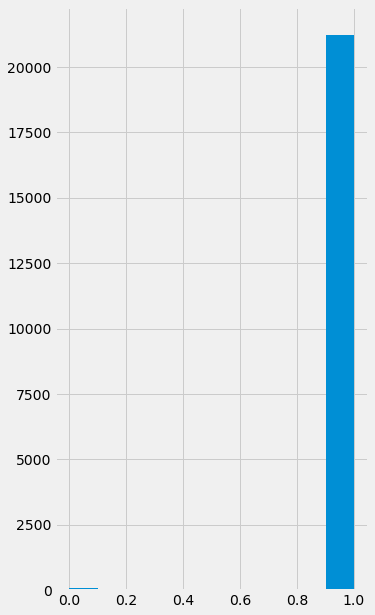

In [30]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(5, 10))
plt.hist(y_train)
plt.show()

### Pipline buliding

In [31]:
ohe_transform_col = ['Record_day','Record_month', 'Record_year', 'Stealing_date', 'Stealing_hour',
                     'Report_stealing_date', 'Report_stealing_hour', 'Berlin_code_area', 'Bike_type',
                     'Crime_type','Crime_reason','Administrative_district', 'District', 'Quarter', 'Street_name']

ohe_transformer = Pipeline(steps = [
    ('ohe_transform', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

sc_transform_col = ['Bike_value']

sc_transformer = Pipeline(steps = [
    ('sc_transform', StandardScaler())   
])


preprocessor = ColumnTransformer(transformers = [
    ('tnf1', ohe_transformer, ohe_transform_col),
    ('tnf2', sc_transformer, sc_transform_col),
])

#### Oversampling method

In [32]:
oversampling = SMOTE(sampling_strategy='minority', random_state=42)

#### Assembly all classifiers in one pipline

In [52]:
classifiers = [
    BernoulliNB(),
    LogisticRegression(max_iter=500, random_state=42),
    DecisionTreeClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]

In [53]:
Models_df = pd.DataFrame()

pipe = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifier', None)
])

for model in classifiers:
    pipe_params = {
                'classifier': model
    }
    
    pipe.set_params(**pipe_params)
    
    start_time = time.time()
    pipe.fit(X_train, y_train)
    end_time = time.time()
    
    y_pred = pipe.predict_proba(X_test)
    
    score = roc_auc_score(y_test, y_pred[:,1])
    
    param_dict = {
        'model': model.__class__.__name__,
        'Test score': score,
        'Test time elapsed': end_time - start_time
    }
    
    Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
    
Models_df.reset_index(drop=True, inplace=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_11664/2197663684.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_11664/2197663684.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_11664/2197663684.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_df = Models_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_11664/2197663684.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [54]:
Models_df.sort_values('Test score', ascending=False)

,model,Test score,Test time elapsed
4,GradientBoostingClassifier,0.999306,836.815086
5,RandomForestClassifier,0.999222,60.011368
1,LogisticRegression,0.979215,10.162770
3,SVC,0.967706,550.402045
2,DecisionTreeClassifier,0.866711,16.858137
0,BernoulliNB,0.671780,2.869845


#### *Score* boxplot for all models

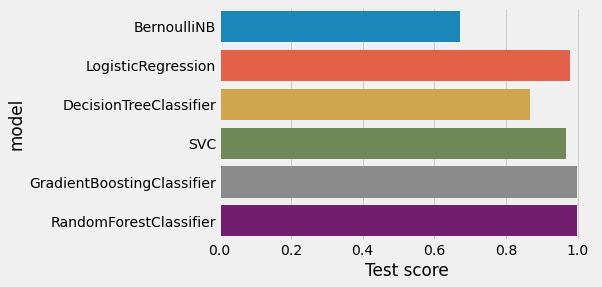

In [55]:
sns.barplot(data=Models_df, x='Test score', y='model');

#### *Time* boxplot for all models

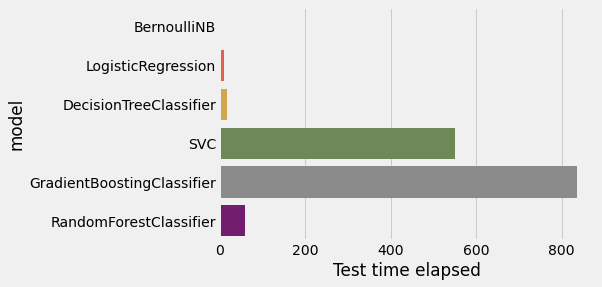

In [56]:
sns.barplot(data=Models_df, x='Test time elapsed', y='model');

#### Assembly all classifiers in one pipline only in X_train and y_train part of data

In [57]:
Models_train_df = pd.DataFrame()

pipe_train = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifier', None)
])

for model in classifiers:
    pipe_params = {
                'classifier': model
    }
    
    pipe_train.set_params(**pipe_params)
    
    start_time = time.time()
    pipe_train.fit(X_train, y_train)
    end_time = time.time()
 
    y_pred = pipe_train.predict_proba(X_train)
    
    score = roc_auc_score(y_train, y_pred[:,1])
 
    param_dict = {
        'model': model.__class__.__name__,
        'Train score': score,
        'Train time elapsed': end_time - start_time
    }
    
    Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
    
Models_train_df.reset_index(drop=True, inplace=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_11664/3546435241.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_11664/3546435241.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_11664/3546435241.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_train_df = Models_train_df.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_11664/3546435241.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [58]:
Models_train_df.sort_values('Train score', ascending=False)

,model,Train score,Train time elapsed
2,DecisionTreeClassifier,1.000000,17.715665
3,SVC,1.000000,508.566103
5,RandomForestClassifier,1.000000,58.628224
4,GradientBoostingClassifier,1.000000,809.740896
1,LogisticRegression,0.999995,10.418654
0,BernoulliNB,0.997564,2.743919


#### Join two DataFrame with each model results

In [59]:
Models_df_all = Models_df.join(Models_train_df.set_index('model'), how='left', on='model')

#### Comparison each model base on prediction train and test data for investigate which model is underfitting/overfitting

In [60]:
Models_df_all

,model,Test score,Test time elapsed,Train score,Train time elapsed
0,BernoulliNB,0.671780,2.869845,0.997564,2.743919
1,LogisticRegression,0.979215,10.162770,0.999995,10.418654
2,DecisionTreeClassifier,0.866711,16.858137,1.000000,17.715665
3,SVC,0.967706,550.402045,1.000000,508.566103
4,GradientBoostingClassifier,0.999306,836.815086,1.000000,809.740896
5,RandomForestClassifier,0.999222,60.011368,1.000000,58.628224


### Hyperparameters tuning of Decision Tree

In [33]:
clf1 = DecisionTreeClassifier(random_state=42)

In [34]:
pipe_gv = Pipeline(steps = [('preprocessor', preprocessor),
                            ('oversampling', oversampling),
                            ('classifier', clf1)
])

In [44]:
params_dt = {}
params_dt['classifier__max_depth'] = [2, 5, 10]
params_dt['classifier__min_samples_split'] = [2, 5, 10]
params_dt['classifier__min_samples_leaf'] = [2, 5, 10]
params_dt['classifier__max_leaf_nodes'] = [2, 5, 10]
params_dt['classifier'] = [clf1]

In [45]:
params = [params_dt]

In [46]:
grid = GridSearchCV(pipe_gv, params, cv=10, verbose=1)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 81 candidates, totalling 810 fits


{'classifier': DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=5,
                        random_state=42),
 'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 10,
 'classifier__min_samples_leaf': 5,
 'classifier__min_samples_split': 2}

In [47]:
classifiers_hiper = [
    BernoulliNB(),
    LogisticRegression(max_iter=500, random_state=42),
    DecisionTreeClassifier(random_state=42, max_depth=10,
                           max_leaf_nodes=10,
                           min_samples_leaf=5,
                           min_samples_split=2),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]

In [48]:
Models_hiper_params = pd.DataFrame()

pipe_hiper_params = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('oversampling', oversampling),
    ('classifiers_hiper', None)
])

for model in classifiers_hiper:
    pipe_hiper_params_params = {
                'classifiers_hiper': model
    }
    
    pipe_hiper_params.set_params(**pipe_hiper_params_params)
    
    start_time = time.time()
    pipe_hiper_params.fit(X_train, y_train)
    end_time = time.time()
    
    y_pred = pipe_hiper_params.predict_proba(X_test)
    
    score = roc_auc_score(y_test, y_pred[:,1])
    
    param_dict = {
        'model': model.__class__.__name__,
        'Test score': score,
        'Test time elapsed': end_time - start_time
    }
    
    Models_hiper_params = Models_hiper_params.append(pd.DataFrame(param_dict, index=[0]))
    
Models_hiper_params.reset_index(drop=True, inplace=True)

C:\Users\dell\AppData\Local\Temp/ipykernel_11664/3905189672.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_hiper_params = Models_hiper_params.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_11664/3905189672.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_hiper_params = Models_hiper_params.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_11664/3905189672.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Models_hiper_params = Models_hiper_params.append(pd.DataFrame(param_dict, index=[0]))
C:\Users\dell\AppData\Local\Temp/ipykernel_11664/3905189672.py:30: FutureWarning: The frame.append method is deprecated and will be remo

In [49]:
Models_hiper_params.sort_values('Test score', ascending=False)

,model,Test score,Test time elapsed
4,GradientBoostingClassifier,0.999306,818.378474
5,RandomForestClassifier,0.999222,63.503752
2,DecisionTreeClassifier,0.998965,18.038298
1,LogisticRegression,0.979215,9.839911
3,SVC,0.967706,540.510839
0,BernoulliNB,0.671780,2.794779


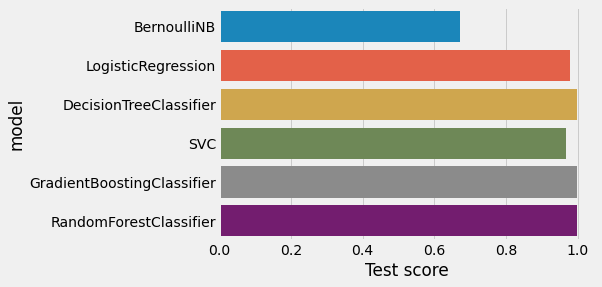

In [50]:
sns.barplot(data=Models_hiper_params, x='Test score', y='model');

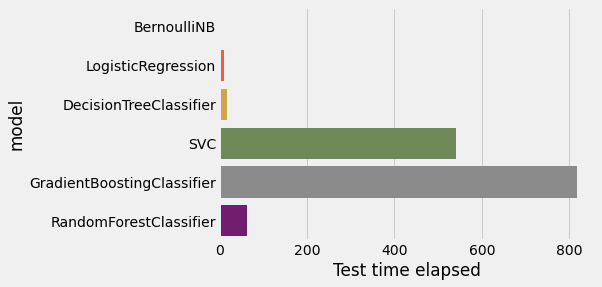

In [51]:
sns.barplot(data=Models_hiper_params, x='Test time elapsed', y='model');